In [1]:
#Import depdendencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Set graph default visuals
from matplotlib import rcParams
rcParams['figure.figsize'] = 18, 8
sns.set_style('darkgrid')

In [3]:
#Import data set
customer_df = pd.read_csv('customers.csv', index_col = 'CustomerID')
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
################################################# DATA EXPLORATION #############################################################

In [5]:
#Checking general information about the data set
customer_df.info()

#The data set in general contains no null value.
# There are a total of 200 rows and 4 columns.
# Other than genre which is a string type object, every other attributes are numerical integer

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
#Checking statistical data of the data set
customer_df.describe()

#There is no outstanding problem with the statistical data of the data set.
# Since min != 0 => There seems to be no empty value in the data set.

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
#We can call .drop_duplicates(inplace = True) to remove duplicate attributes. However, there is no repetated attribute in this 
# data set.
#We will just do it anyway.
customer_df.drop_duplicates(inplace = True)
customer_df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
############################################ DATA PROCESSING ###################################################################

In [9]:
#We will only utilize 2 attributes spending score and income value for the KMeans model
X = customer_df.iloc[:, [2, 3]].values #converted from pd DataFrame to numpy array
print(type(X))

<class 'numpy.ndarray'>


In [10]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [11]:
################################## CREATE KMEANS CLUSTERING MODEL ############################################################

In [12]:
#KMeans Clustering is an unsupervized learning algorithm that tries to cluster data based on their similarity.
# In KMeans Clustering, we have the specify number of cluster we want the data to be grouped into. The algorithm randomly assigns
# each observation to a cluster, and finds the centroid of each cluster. Then the algorithm iterates through
# two steps: 1. Reassign data points to the cluster whose centroid is the close 
#           2. Calculate the new centroid of each cluster.
# These two steps are peated till the within cluster variation cannot be reduced any futher. The within cluster variation is 
# calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

In [13]:
#Essentially, pick randomly k cluster centers => group each point from data to the closet cluster centers => give multiple clusters 
#=> find new centroids in each clusters => These centroid are the new cluster centers => Assign each point to closet cluster center
#=> Repeat the finding cluster centers process untill convergerce (lower the better)

#More information can be found here: 
#https://machinelearninginterview.com/topics/machine-learning/how-to-find-the-optimal-number-of-clusters-in-k-means-elbow-and-silhouette-methods/

O:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


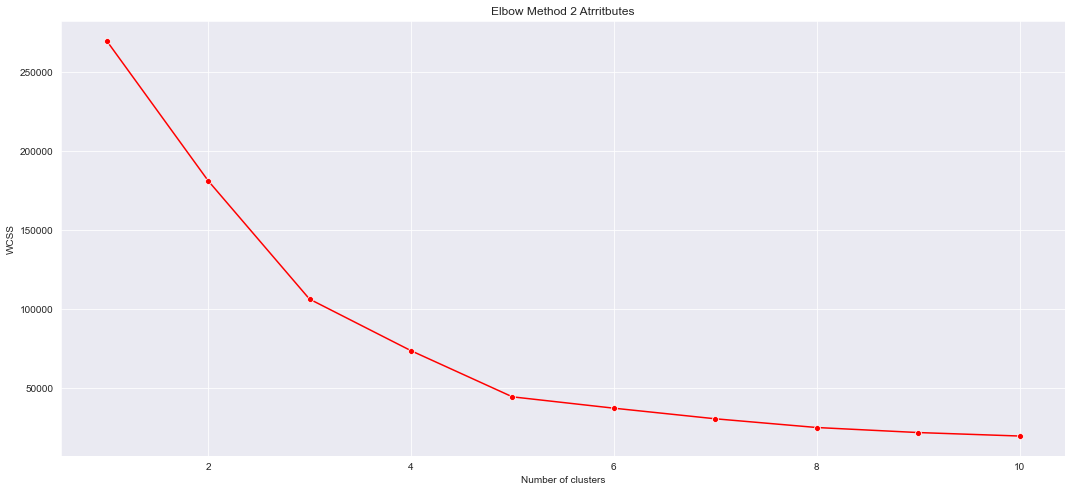

In [14]:
#Utilizing the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = [] #Within cluster sum of square. (lower is better)
for i in range(1, 11):
    #using the same random state to ensure same value in the end
    kmeans = KMeans(n_clusters = i, random_state = 129)
    kmeans.fit(X)
    #inertia method returns wcss for each model
    wcss.append(kmeans.inertia_)
    
#Utilizing lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x = range(1, 11), y = wcss, marker = 'o', color = 'red')
plt.title('Elbow Method 2 Atrritbutes')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Understanding the elbow method: The elbow method helps us find the appropriate K values through visual. 
# Here we can see a steep drop in WCSS from K = 1 to K = 5. After K = 5, the value of WCSS continues to drop but very slowly.
# The elbow point is the point of transition from steep drop to slow drop hence called the elbow point. Here the elbow point is 5.
# The reasons why we want to choose the elbow point and not continue with lower wcss value is because the more k we use, the more
# likely it will split 1 cluster into 2 different clusters. Eventually, if we have k = n clusters then each point will be it own
# cluster. We of course, don't want this to happen.

In [15]:
#Create our KMeans model and run our predictions on the X vector (spending score, income)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 129)
y_pred = kmeans.fit_predict(X)

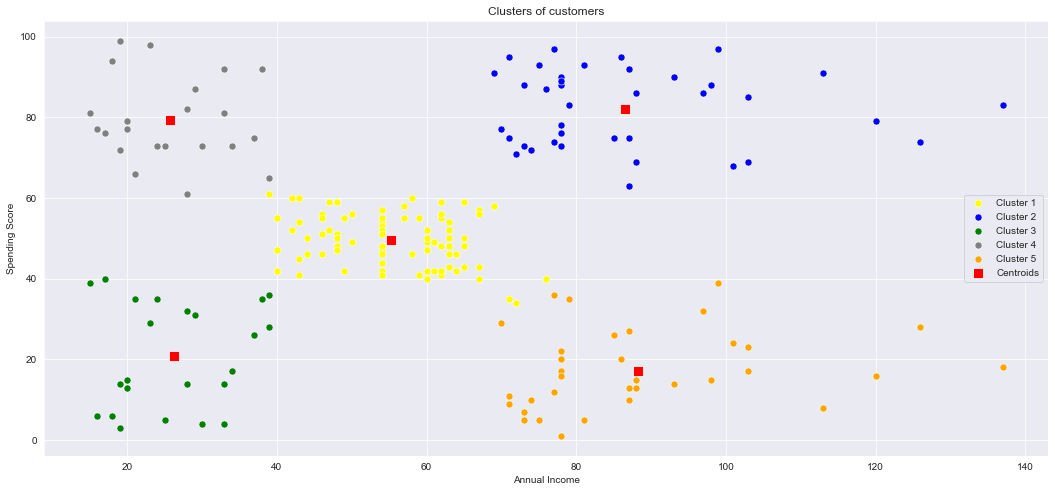

In [16]:
#Visualizing our clusters
sns.scatterplot(x=X[y_pred == 0, 0], y=X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X[y_pred == 1, 0], y=X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X[y_pred == 2, 0], y=X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X[y_pred == 3, 0], y=X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X[y_pred == 4, 0], y=X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

#The model seems to have clustered the data pretty accurately. Unfortunately, as an unsuperversized leraning data set, there is 
# no actual results so we can see how accurate our model is.

In [17]:
########################################### NEW KMEANS MODEL #################################################################

In [18]:
#Creating the previous KMeans model but with 3 attributes instead of 2

X_new = customer_df.iloc[:, [1, 2, 3]].values #converted from pd DataFrame to numpy array
print(X_new)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

O:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


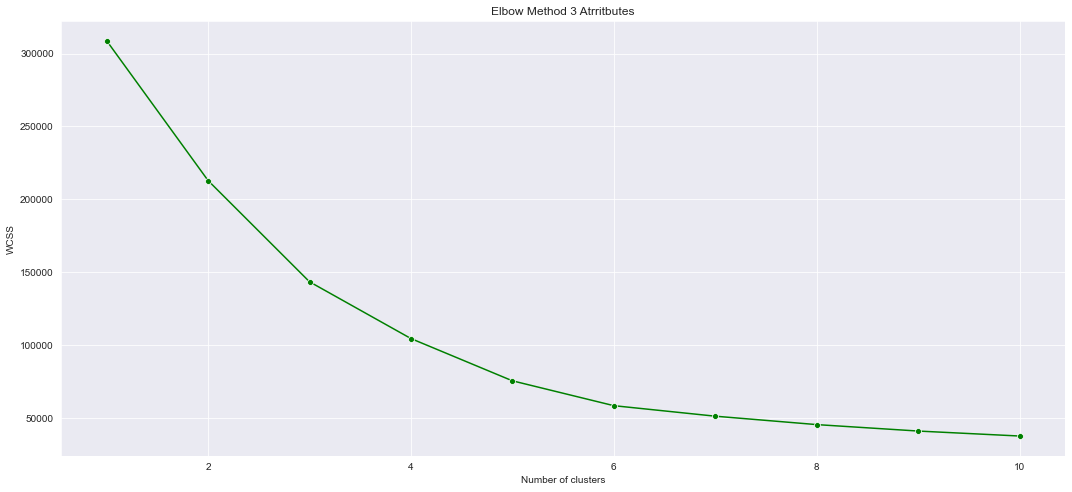

In [19]:
#Elbow method with 3 attributes
wcss_new = [] 
for i in range(1, 11):
    #using the same random state to ensure same value in the end
    kmeans = KMeans(n_clusters = i, random_state = 129)
    kmeans.fit(X_new)
    #inertia method returns wcss for each model
    wcss_new.append(kmeans.inertia_)
    
#Utilizing lineplot to visualize wcss and find optimal number of clusters
sns.lineplot(x = range(1, 11), y = wcss_new, marker = 'o', color = 'green')
plt.title('Elbow Method 3 Atrritbutes')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Seems like the elbow point remain at k = 5 even with an extra attribute. Although the graph seems to a bit flatter than 
# the previous model so the elbow method might not even be acceptable here. Alternative method would be to use the Silhouette 
# method.

In [20]:
#Create our KMeans model and run our predictions on the new model
kmeans_new = KMeans(n_clusters = 5, init = 'k-means++', random_state = 129)
y_pred_new = kmeans.fit_predict(X_new)

#Unfortuntely since 3 attributes mean a 3D graph, it is not possible to be displayed on Jupyter Notebooks.